# Project on Vaccine Usage Prediction using MLE & SGD

# Logistic regression analysis is used to examine the association of (categorical or continuous) independent variable(s) with one dichotomous dependent variable

# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
myvaccine_data=pd.read_excel("h1n1_vaccine_prediction.xlsx")


In [3]:
myvaccine_data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
myvaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [5]:
myvaccine_data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

# Drop null values

In [6]:
myvaccine_data.dropna(inplace=True,axis=0)

In [7]:
myvaccine_data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [8]:
myvaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  11794 non-null  int64  
 1   h1n1_worry                 11794 non-null  float64
 2   h1n1_awareness             11794 non-null  float64
 3   antiviral_medication       11794 non-null  float64
 4   contact_avoidance          11794 non-null  float64
 5   bought_face_mask           11794 non-null  float64
 6   wash_hands_frequently      11794 non-null  float64
 7   avoid_large_gatherings     11794 non-null  float64
 8   reduced_outside_home_cont  11794 non-null  float64
 9   avoid_touch_face           11794 non-null  float64
 10  dr_recc_h1n1_vacc          11794 non-null  float64
 11  dr_recc_seasonal_vacc      11794 non-null  float64
 12  chronic_medic_condition    11794 non-null  float64
 13  cont_child_undr_6_mnths    11794 non-null  flo

# Drop D-type "objects" not relevant to prediction

In [9]:
myvaccine_data.drop(['qualification','race','income_level','marital_status','housing_status','employment','census_msa'], axis = 1, inplace = True)

In [10]:
myvaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  11794 non-null  int64  
 1   h1n1_worry                 11794 non-null  float64
 2   h1n1_awareness             11794 non-null  float64
 3   antiviral_medication       11794 non-null  float64
 4   contact_avoidance          11794 non-null  float64
 5   bought_face_mask           11794 non-null  float64
 6   wash_hands_frequently      11794 non-null  float64
 7   avoid_large_gatherings     11794 non-null  float64
 8   reduced_outside_home_cont  11794 non-null  float64
 9   avoid_touch_face           11794 non-null  float64
 10  dr_recc_h1n1_vacc          11794 non-null  float64
 11  dr_recc_seasonal_vacc      11794 non-null  float64
 12  chronic_medic_condition    11794 non-null  float64
 13  cont_child_undr_6_mnths    11794 non-null  flo

In [11]:
#Convert objects as binary

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
LE=LabelEncoder()

In [14]:
myvaccine_data["age_bracket"]=LE.fit_transform(myvaccine_data.age_bracket)
myvaccine_data["sex"]=LE.fit_transform(myvaccine_data.sex)

In [15]:
myvaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  11794 non-null  int64  
 1   h1n1_worry                 11794 non-null  float64
 2   h1n1_awareness             11794 non-null  float64
 3   antiviral_medication       11794 non-null  float64
 4   contact_avoidance          11794 non-null  float64
 5   bought_face_mask           11794 non-null  float64
 6   wash_hands_frequently      11794 non-null  float64
 7   avoid_large_gatherings     11794 non-null  float64
 8   reduced_outside_home_cont  11794 non-null  float64
 9   avoid_touch_face           11794 non-null  float64
 10  dr_recc_h1n1_vacc          11794 non-null  float64
 11  dr_recc_seasonal_vacc      11794 non-null  float64
 12  chronic_medic_condition    11794 non-null  float64
 13  cont_child_undr_6_mnths    11794 non-null  flo

In [16]:
#Countplot graph showing vaccine count for children

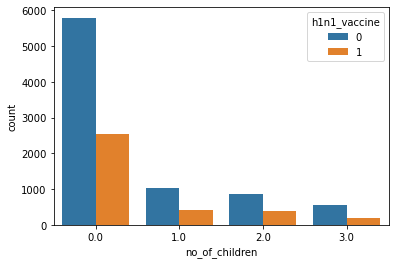

In [17]:
sns.countplot(x="no_of_children",data=myvaccine_data,hue="h1n1_vaccine");

In [18]:
#Histogram plot graph showing vaccine count for adults

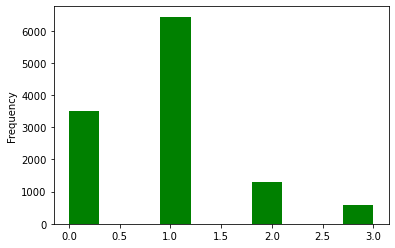

In [19]:
myvaccine_data.no_of_adults.plot.hist(color="green");

In [20]:
#Countplot graph showing vaccine count for children

Text(0.5, 1.0, 'Total no_of_children')

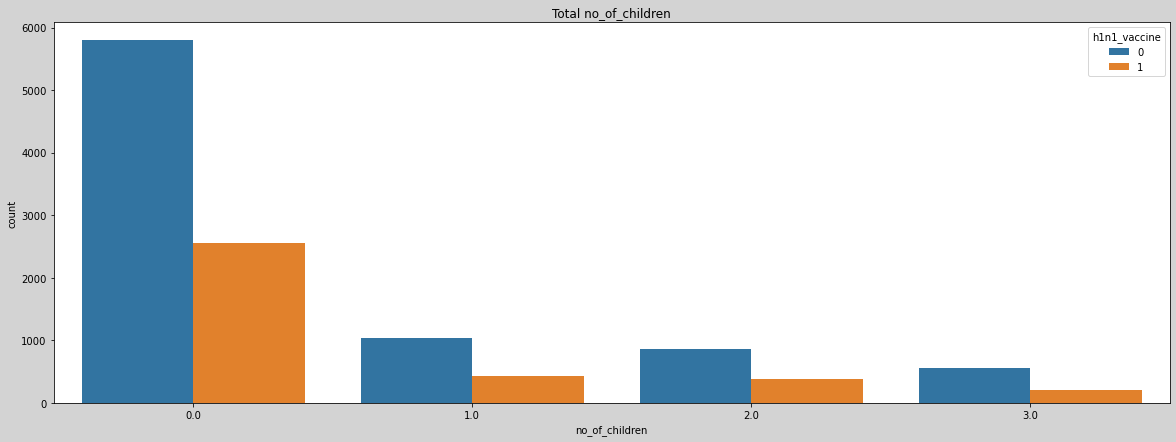

In [21]:
plt.figure(figsize=(20,7),facecolor="lightgrey",frameon=True,edgecolor='blue')
#sns.countplot(mydata_liver.Total_Protiens,hue="Gender")
sns.countplot(x="no_of_children",data=myvaccine_data,hue="h1n1_vaccine");
plt.title("Total no_of_children")


In [22]:
#Scatter plot graph showing total_no_of_children vs total_no of adults 

Text(0.5, 1.0, 'TC vs TA')

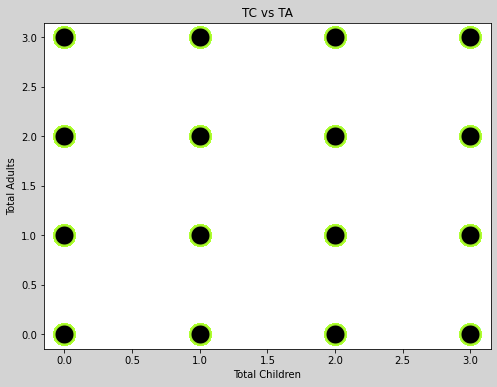

In [23]:
plt.figure(figsize=(8,6),facecolor="lightgrey")
plt.scatter(myvaccine_data.no_of_children,myvaccine_data.no_of_adults,
           color="black",alpha=0.9,edgecolors="greenyellow",linewidths=2,s=400)
plt.xlabel("Total Children")
plt.ylabel("Total Adults")
plt.title("TC vs TA")

In [24]:
#boxplot graph showing total_no_of_children vs total_no of adults 

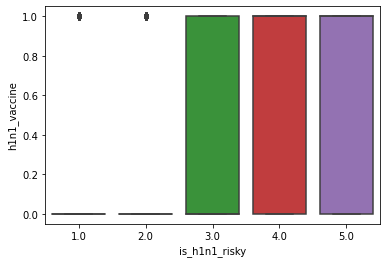

In [25]:
sns.boxplot(x="is_h1n1_risky",y="h1n1_vaccine",data=myvaccine_data);

In [26]:
#Violinplot graph showing people with chronic medical condition

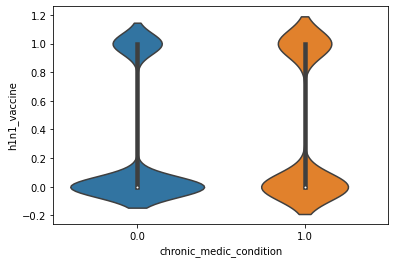

In [27]:
sns.violinplot(x="chronic_medic_condition",y="h1n1_vaccine",data=myvaccine_data);

In [28]:
myvaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  11794 non-null  int64  
 1   h1n1_worry                 11794 non-null  float64
 2   h1n1_awareness             11794 non-null  float64
 3   antiviral_medication       11794 non-null  float64
 4   contact_avoidance          11794 non-null  float64
 5   bought_face_mask           11794 non-null  float64
 6   wash_hands_frequently      11794 non-null  float64
 7   avoid_large_gatherings     11794 non-null  float64
 8   reduced_outside_home_cont  11794 non-null  float64
 9   avoid_touch_face           11794 non-null  float64
 10  dr_recc_h1n1_vacc          11794 non-null  float64
 11  dr_recc_seasonal_vacc      11794 non-null  float64
 12  chronic_medic_condition    11794 non-null  float64
 13  cont_child_undr_6_mnths    11794 non-null  flo

In [29]:
y_dep=myvaccine_data.iloc[:,26]

In [30]:
y_dep

0        0
1        0
7        1
9        0
10       1
        ..
26697    0
26699    0
26701    0
26703    0
26706    0
Name: h1n1_vaccine, Length: 11794, dtype: int64

In [31]:
#Assigning dependent and independent variables using Iloc

In [32]:
x_ind=myvaccine_data.iloc[:,1:26]

In [33]:
x_ind

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,sex,no_of_adults,no_of_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,1.0,2.0,2.0,1.0,2.0,3,0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,5.0,4.0,4.0,4.0,2.0,4.0,1,1,0.0,0.0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,5.0,2.0,1.0,4.0,2.0,1.0,2,0,2.0,0.0
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,4.0,2.0,2.0,4.0,2.0,2.0,3,1,0.0,0.0
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4.0,1.0,2.0,5.0,4.0,4.0,2,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,4.0,2.0,2.0,4.0,2.0,2.0,4,1,1.0,0.0
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,5.0,1.0,5.0,5.0,1.0,4.0,2,0,1.0,0.0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,2.0,4.0,4.0,2.0,4.0,0,0,3.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,4.0,2.0,2.0,5.0,1.0,1.0,0,1,1.0,0.0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=2)

In [36]:
import statsmodels.api as sm

In [37]:
model_stat=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.492224
         Iterations 6


In [38]:
model_stat.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit               Pseudo R-squared:    0.199    
Dependent Variable:     h1n1_vaccine        AIC:                 9338.2708
Date:                   2021-09-01 16:43    BIC:                 9517.0754
No. Observations:       9435                Log-Likelihood:      -4644.1  
Df Model:               24                  LL-Null:             -5794.9  
Df Residuals:           9410                LLR p-value:         0.0000   
Converged:              1.0000              Scale:               1.0000   
No. Iterations:         6.0000                                            
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
h1n1_worry                 0.0808   0.0350   2.3102 0.0209  0.0122  0.1493
h1n1_awareness            -0.0573   0.0432  -1.3262 0.1848 -0.1420  0.0274
antiviral_medication      -0.1318   0.1177  -1.1197 0.2628 -0.3624  0.0989
contact_avoidance         -0.2097   0.0643  -3.2628 0.0011 -0.3357 -0.0837
bought_face_mask           0.1857   0.1046   1.7764 0.0757 -0.0192  0.3907
wash_hands_frequently     -0.4185   0.0743  -5.6313 0.0000 -0.5641 -0.2728
avoid_large_gatherings    -0.0694   0.0693  -1.0024 0.3162 -0.2052  0.0663
reduced_outside_home_cont -0.0863   0.0704  -1.2259 0.2202 -0.2243  0.0517
avoid_touch_face          -0.1445   0.0627  -2.3052 0.0212 -0.2673 -0.0216
dr_recc_h1n1_vacc          2.0633   0.0783  26.3377 0.0000  1.9097  2.2168
dr_recc_seasonal_vacc     -0.4845   0.0760  -6.3765 0.0000 -0.6334 -0.3356
chronic_medic_condition   -0.0075   0.0590  -0.1274 0.8987 -0.1231  0.1081
cont_child_undr_6_mnths    0.0842   0.0926   0.9090 0.3633 -0.0973  0.2657
is_health_worker           0.7583   0.0779   9.7297 0.0000  0.6056  0.9111
has_health_insur          -0.3750   0.0765  -4.9007 0.0000 -0.5250 -0.2250
is_h1n1_vacc_effective     0.0020   0.0299   0.0669 0.9467 -0.0566  0.0607
is_h1n1_risky              0.4581   0.0259  17.6916 0.0000  0.4073  0.5088
sick_from_h1n1_vacc       -0.0446   0.0238  -1.8768 0.0605 -0.0912  0.0020
is_seas_vacc_effective    -0.2200   0.0279  -7.8850 0.0000 -0.2747 -0.1653
is_seas_risky              0.2362   0.0242   9.7417 0.0000  0.1886  0.2837
sick_from_seas_vacc       -0.3195   0.0238 -13.4151 0.0000 -0.3661 -0.2728
age_bracket               -0.0355   0.0208  -1.7128 0.0868 -0.0762  0.0051
sex                       -0.1442   0.0529  -2.7262 0.0064 -0.2479 -0.0405
no_of_adults              -0.2599   0.0345  -7.5371 0.0000 -0.3275 -0.1923
no_of_children            -0.2167   0.0319  -6.7945 0.0000 -0.2792 -0.1542
==========================================================================

"""

In [39]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [40]:
model1.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred=model1.predict(x_test)

In [42]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
#Confusion matrix to determine the accuracy score using the y_test and y_pred

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [45]:
confusion_matrix(y_test,y_pred)

array([[1518,  148],
       [ 286,  407]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred)

0.8160237388724035

In [47]:
(1518+407)/(1518+407+148+286)

0.8160237388724035

# Variable selections 


In [48]:
model_stat=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.492224
         Iterations 6


In [49]:
model_stat.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit               Pseudo R-squared:    0.199    
Dependent Variable:     h1n1_vaccine        AIC:                 9338.2708
Date:                   2021-09-01 16:43    BIC:                 9517.0754
No. Observations:       9435                Log-Likelihood:      -4644.1  
Df Model:               24                  LL-Null:             -5794.9  
Df Residuals:           9410                LLR p-value:         0.0000   
Converged:              1.0000              Scale:               1.0000   
No. Iterations:         6.0000                                            
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
h1n1_worry                 0.0808   0.0350   2.3102 0.0209  0.0122  0.1493
h1n1_awareness            -0.0573   0.0432  -1.3262 0.1848 -0.1420  0.0274
antiviral_medication      -0.1318   0.1177  -1.1197 0.2628 -0.3624  0.0989
contact_avoidance         -0.2097   0.0643  -3.2628 0.0011 -0.3357 -0.0837
bought_face_mask           0.1857   0.1046   1.7764 0.0757 -0.0192  0.3907
wash_hands_frequently     -0.4185   0.0743  -5.6313 0.0000 -0.5641 -0.2728
avoid_large_gatherings    -0.0694   0.0693  -1.0024 0.3162 -0.2052  0.0663
reduced_outside_home_cont -0.0863   0.0704  -1.2259 0.2202 -0.2243  0.0517
avoid_touch_face          -0.1445   0.0627  -2.3052 0.0212 -0.2673 -0.0216
dr_recc_h1n1_vacc          2.0633   0.0783  26.3377 0.0000  1.9097  2.2168
dr_recc_seasonal_vacc     -0.4845   0.0760  -6.3765 0.0000 -0.6334 -0.3356
chronic_medic_condition   -0.0075   0.0590  -0.1274 0.8987 -0.1231  0.1081
cont_child_undr_6_mnths    0.0842   0.0926   0.9090 0.3633 -0.0973  0.2657
is_health_worker           0.7583   0.0779   9.7297 0.0000  0.6056  0.9111
has_health_insur          -0.3750   0.0765  -4.9007 0.0000 -0.5250 -0.2250
is_h1n1_vacc_effective     0.0020   0.0299   0.0669 0.9467 -0.0566  0.0607
is_h1n1_risky              0.4581   0.0259  17.6916 0.0000  0.4073  0.5088
sick_from_h1n1_vacc       -0.0446   0.0238  -1.8768 0.0605 -0.0912  0.0020
is_seas_vacc_effective    -0.2200   0.0279  -7.8850 0.0000 -0.2747 -0.1653
is_seas_risky              0.2362   0.0242   9.7417 0.0000  0.1886  0.2837
sick_from_seas_vacc       -0.3195   0.0238 -13.4151 0.0000 -0.3661 -0.2728
age_bracket               -0.0355   0.0208  -1.7128 0.0868 -0.0762  0.0051
sex                       -0.1442   0.0529  -2.7262 0.0064 -0.2479 -0.0405
no_of_adults              -0.2599   0.0345  -7.5371 0.0000 -0.3275 -0.1923
no_of_children            -0.2167   0.0319  -6.7945 0.0000 -0.2792 -0.1542
==========================================================================

"""

In [50]:
# RoC Curve-(Receiver operating characteristic curve)
# ROC is used to find the threshold point

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [52]:
logis_roc_auc=roc_auc_score(y_test,y_pred)

In [53]:
fpr,tpr,thresholds=roc_curve(y_test,model1.predict_proba(x_test)[:,1])

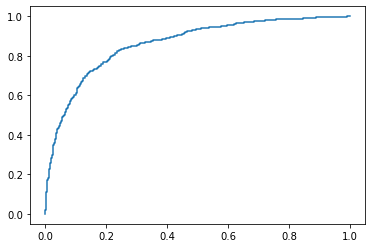

In [54]:
plt.plot(fpr,tpr,logis_roc_auc);

In [71]:
roc_t=LogisticRegression(class_weight="balanced")
roc_t.fit(x_train,y_train)
THRESHOLD=0.6

In [72]:
y_pred_roc=np.where(roc_t.predict_proba(x_test)[:,1]>THRESHOLD,1,0)

In [73]:
accuracy_score(y_test,y_pred_roc)

0.8151759220008478

In [74]:
from sklearn.metrics import classification_report

In [75]:
c_Report=classification_report(y_test,y_pred_roc)

In [76]:
print(c_Report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1666
           1       0.68      0.69      0.69       693

    accuracy                           0.82      2359
   macro avg       0.78      0.78      0.78      2359
weighted avg       0.82      0.82      0.82      2359



In [ ]:
#Report prints the accuracy rate, TRUE Positive rate(measure for how many true positives get predicted out of all positives)
 and Precision (measure for the correctness of a positive prediction)